<font color = 'brown'  size = 3>
    
# 03 - Regresión Aplicada.
#      Mortalidad por Diabetes

<font color = 'purple'>
    
## 01 - Información sobre la mortalidad por diabetes.

Se hará un análisis sobre la evolución de la diabetes en una persona durante un año. Se hará una caracterización de la diabates a través de diez rasgos de la persona y con ello se determinará si la persona padece o no la enfermedad. 

Los rasgos de caracterización serán: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo (S1, S2, S3, S4, S5, S6).

Se utilizará un 'dataset' que contiene información de 442 pacientes (los rasgos mencionados anteriormente) así como la respuesta de interés y una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de salida ($y$) varian entre 25 y 346.

Fuente de la información: [Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

Comenzamos por importar las librerías de utilidad y cargar el 'dataset'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('diabetes.csv', sep = '\t')   # Indicamos la separación que tienen los datos (tabulación)

In [3]:
# Se despliegan las primeras 10 muestras (rasgos, objetivo)
datos.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


Con el método 'describe()' se puede generar datos estadísticos sobre el dataset.

In [4]:
datos.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


<font size=5 color='blue'>

Regression analysis

<font size=4 color='black'>
    
In statistical modeling, $\textbf {regression analysis}$ is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').
    
More: [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)

<font size=4>

Se reordenan la muestras (los renglones del DataFrame) al azar.

In [5]:
datos = datos.sample(frac = 1)
datos.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
375,61,2,26.1,126.00,215,129.8,57.0,4.00,4.9488,96,217
180,38,2,26.8,105.00,181,119.2,37.0,5.00,4.8203,91,107
321,75,1,31.2,117.67,229,138.8,29.0,7.90,5.7236,106,230
12,53,1,23.7,92.00,186,109.2,62.0,3.00,4.3041,81,179
90,52,1,24.0,83.00,167,86.6,71.0,2.00,3.8501,94,98
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
404,44,1,31.4,115.00,165,97.6,52.0,3.00,4.3438,89,293
352,52,2,19.7,81.00,152,53.4,82.0,2.00,4.4188,82,77
125,47,2,25.6,94.00,165,74.8,40.0,4.00,5.5255,93,161


<font size=4>
    
Se dividen la muestras en 2 conjuntos: 90 % para el entrenamiento y 10 % para evaluar el desarrollo. 

In [6]:
validacion = 0.1
entrenamiento = int((1.0 - validacion) * len(datos))

datos_entrenamiento = datos[0:entrenamiento]
datos_validacion= datos[entrenamiento:]

## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

Text(0, 0.5, 'Frequency')

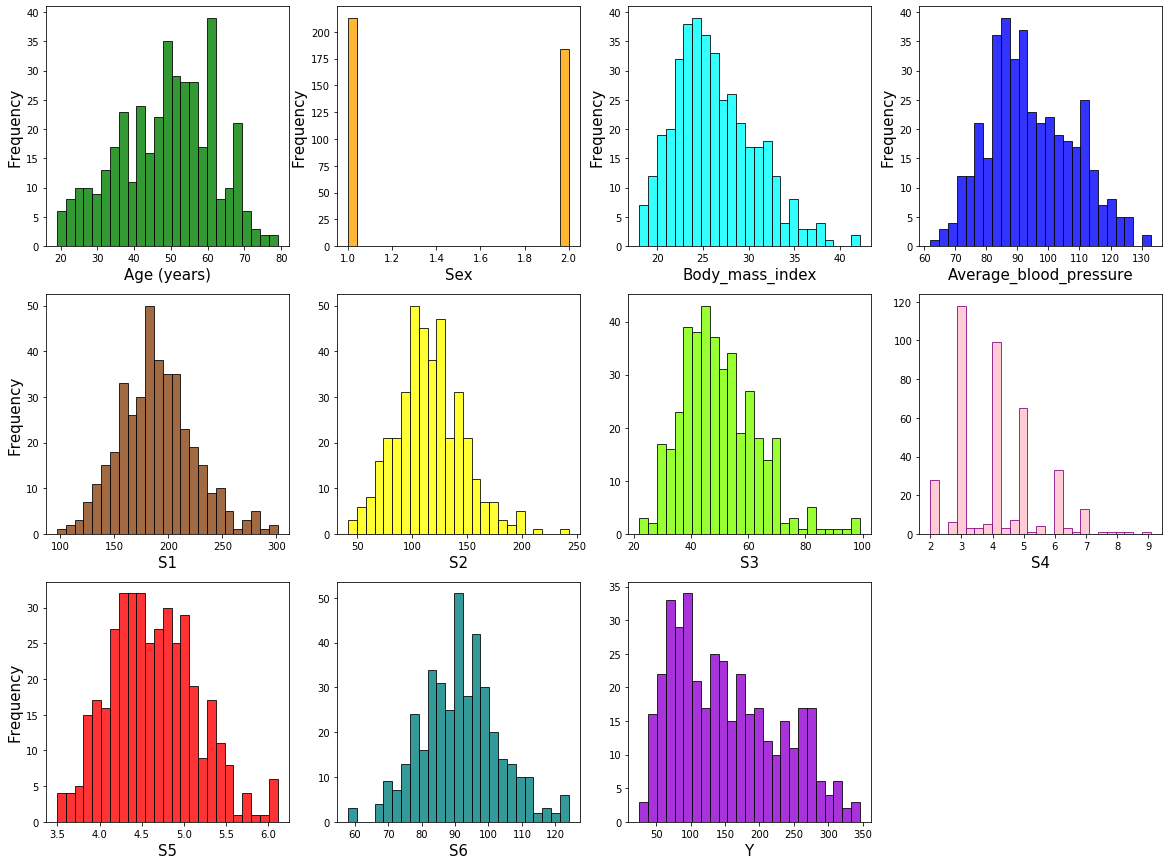

In [7]:
plt.figure(figsize = (20,15)) 

ax1 = plt.subplot(3, 4, 1)
ax2 = plt.subplot(3, 4, 2)
ax3 = plt.subplot(3, 4, 3)
ax4 = plt.subplot(3, 4, 4)
ax5 = plt.subplot(3, 4, 5)
ax6 = plt.subplot(3, 4, 6)
ax7 = plt.subplot(3, 4, 7)
ax8 = plt.subplot(3, 4, 8)
ax9 = plt.subplot(3, 4, 9)
ax10 = plt.subplot(3, 4, 10)
ax11 = plt.subplot(3, 4, 11)

ax1.hist(datos_entrenamiento.AGE, bins = 25, color = 'green', edgecolor = 'black', alpha = 0.8)
ax1.set_xlabel('Age (years)', size = 15)
ax1.set_ylabel('Frequency', size = 15)

ax2.hist(datos_entrenamiento.SEX, bins = 25, color = 'orange', edgecolor = 'black', alpha = 0.8)
ax2.set_xlabel('Sex', size = 15)
ax2.set_ylabel('Frequency', size = 15)

ax3.hist(datos_entrenamiento.BMI, bins = 25, color = 'cyan', edgecolor = 'black', alpha = 0.8)
ax3.set_xlabel('Body_mass_index', size = 15)
ax3.set_ylabel('Frequency', size = 15)

ax4.hist(datos_entrenamiento.BP, bins = 25, color = 'blue', edgecolor = 'black', alpha = 0.8)
ax4.set_xlabel('Average_blood_pressure', size = 15);
ax4.set_ylabel('Frequency', size = 15)

ax5.hist(datos_entrenamiento.S1, bins = 25, color = 'saddlebrown', edgecolor = 'black', alpha = 0.8)
ax5.set_xlabel('S1', size=15)
ax5.set_ylabel('Frequency', size=15)

ax6.hist(datos_entrenamiento.S2, bins = 25, color = 'yellow', edgecolor = 'black', alpha = 0.8)
ax6.set_xlabel('S2', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax7.hist(datos_entrenamiento.S3, bins = 25, color = 'chartreuse', edgecolor = 'black', alpha = 0.8)
ax7.set_xlabel('S3', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax8.hist(datos_entrenamiento.S4, bins = 25, color = 'pink',edgecolor='purple', alpha = 0.8)
ax8.set_xlabel('S4', size = 15);
ax9.set_ylabel('Frequency', size = 15)

ax9.hist(datos_entrenamiento.S5, bins = 25, color = 'red', edgecolor = 'black', alpha = 0.8)
ax9.set_xlabel('S5', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax10.hist(datos_entrenamiento.S6, bins = 25, color = 'teal', edgecolor = 'black', alpha = 0.8)
ax10.set_xlabel('S6', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax11.hist(datos_entrenamiento.Y, bins = 25, color = 'darkviolet', edgecolor = 'black', alpha = 0.8)
ax11.set_xlabel('Y', size = 15)
ax9.set_ylabel('Frequency', size = 15)

<font size=4>

Para trabajar con los modelos se requiere que todas las variables tengan el mismo orden de magnitud. Por ello estas se normalizan, tanto los rasgos (X) y las objetivo o referencia (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [8]:
promedio_entrenamiento = datos_entrenamiento.mean()
desviacion_entrenamiento = datos_entrenamiento.std()

datos_normalizados_entrenamiento = (datos_entrenamiento - promedio_entrenamiento) / desviacion_entrenamiento
datos_normalizados_validacion = (datos_validacion - promedio_entrenamiento) / desviacion_entrenamiento

[Normalization](https://jamesmccaffrey.wordpress.com/2019/01/04/how-to-normalize-training-and-test-data-for-machine-learning/)

<font size=4>
    
Histogramas de las variables normalizados:

Text(0, 0.5, 'Frequency')

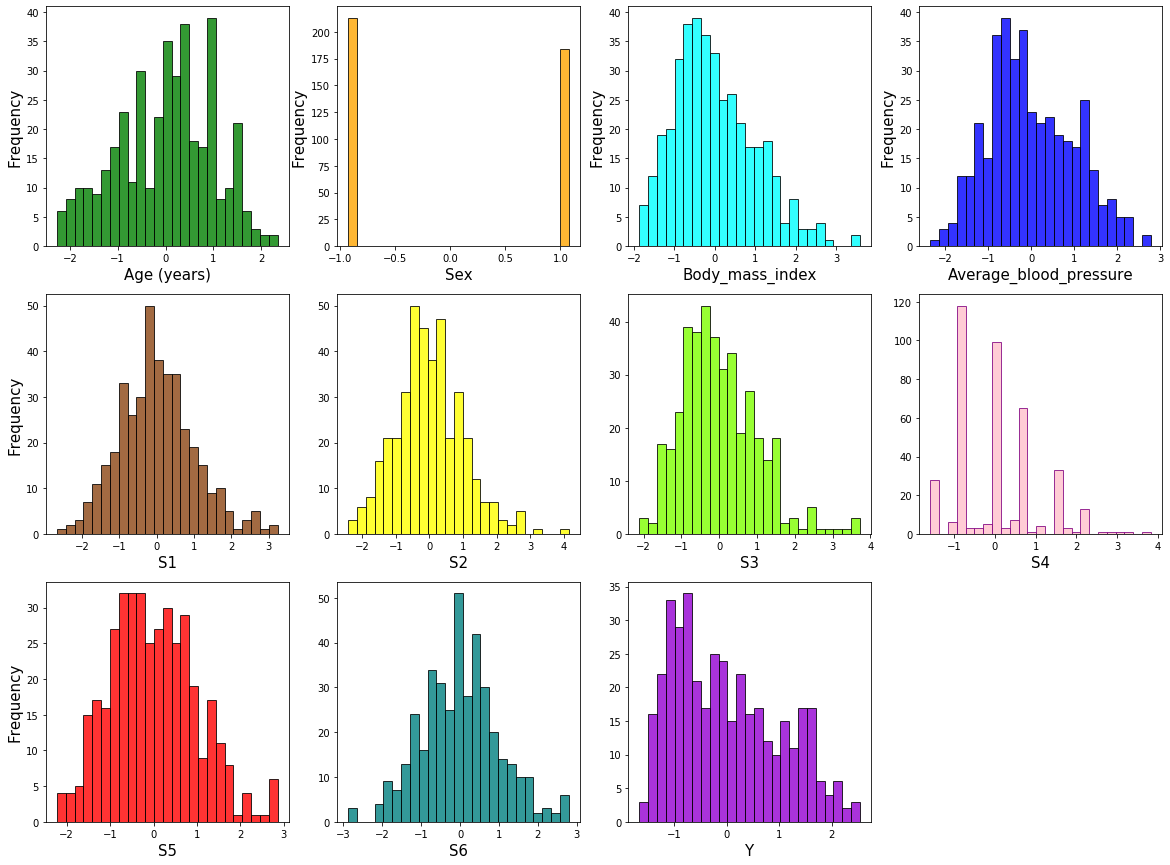

In [9]:
plt.figure(figsize = (20,15)) 

ax1 = plt.subplot(3, 4, 1)
ax2 = plt.subplot(3, 4, 2)
ax3 = plt.subplot(3, 4, 3)
ax4 = plt.subplot(3, 4, 4)
ax5 = plt.subplot(3, 4, 5)
ax6 = plt.subplot(3, 4, 6)
ax7 = plt.subplot(3, 4, 7)
ax8 = plt.subplot(3, 4, 8)
ax9 = plt.subplot(3, 4, 9)
ax10 = plt.subplot(3, 4, 10)
ax11 = plt.subplot(3, 4, 11)

ax1.hist(datos_normalizados_entrenamiento.AGE, bins = 25, color = 'green', edgecolor = 'black', alpha = 0.8)
ax1.set_xlabel('Age (years)', size = 15)
ax1.set_ylabel('Frequency', size = 15)

ax2.hist(datos_normalizados_entrenamiento.SEX, bins = 25, color = 'orange', edgecolor = 'black', alpha = 0.8)
ax2.set_xlabel('Sex', size = 15)
ax2.set_ylabel('Frequency', size = 15)

ax3.hist(datos_normalizados_entrenamiento.BMI, bins = 25, color = 'cyan', edgecolor = 'black', alpha = 0.8)
ax3.set_xlabel('Body_mass_index', size = 15)
ax3.set_ylabel('Frequency', size = 15)

ax4.hist(datos_normalizados_entrenamiento.BP, bins = 25, color = 'blue', edgecolor = 'black', alpha = 0.8)
ax4.set_xlabel('Average_blood_pressure', size = 15);
ax4.set_ylabel('Frequency', size = 15)

ax5.hist(datos_normalizados_entrenamiento.S1, bins = 25, color = 'saddlebrown', edgecolor = 'black', alpha = 0.8)
ax5.set_xlabel('S1', size=15)
ax5.set_ylabel('Frequency', size=15)

ax6.hist(datos_normalizados_entrenamiento.S2, bins = 25, color = 'yellow', edgecolor = 'black', alpha = 0.8)
ax6.set_xlabel('S2', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax7.hist(datos_normalizados_entrenamiento.S3, bins = 25, color = 'chartreuse', edgecolor = 'black', alpha = 0.8)
ax7.set_xlabel('S3', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax8.hist(datos_normalizados_entrenamiento.S4, bins = 25, color = 'pink',edgecolor='purple', alpha = 0.8)
ax8.set_xlabel('S4', size = 15);
ax9.set_ylabel('Frequency', size = 15)

ax9.hist(datos_normalizados_entrenamiento.S5, bins = 25, color = 'red', edgecolor = 'black', alpha = 0.8)
ax9.set_xlabel('S5', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax10.hist(datos_normalizados_entrenamiento.S6, bins = 25, color = 'teal', edgecolor = 'black', alpha = 0.8)
ax10.set_xlabel('S6', size = 15)
ax9.set_ylabel('Frequency', size = 15)

ax11.hist(datos_normalizados_entrenamiento.Y, bins = 25, color = 'darkviolet', edgecolor = 'black', alpha = 0.8)
ax11.set_xlabel('Y', size = 15)
ax9.set_ylabel('Frequency', size = 15)

Los valores de las variables $X$ e $Y$ se extraen de las columnas del dataframe. 

Construyamos los datos de entrada y de salida para el entrenamiento y la validación.

In [10]:
# Datos de entrada para el entrenamiento:
entrenamiento_x = datos_normalizados_entrenamiento.values[:,:-1]
print('Dimensiones de los datos de entrada para el entrenamiento: ', entrenamiento_x.shape)

# Datos de salida para el entrenamiento:
entrenamiento_y = datos_normalizados_entrenamiento.values[:,-1:]
print('Dimensiones de los datos de salida para el entrenamiento:  ', entrenamiento_y.shape)

# Datos de entrada para la validación:
validacion_x = datos_normalizados_validacion.values[:,:-1]
print('Dimensiones de los datos de entrada para la validación:    ', validacion_x.shape)

# Datos de salida para la validación:
validacion_y = datos_normalizados_validacion.values[:,-1:]
print('Dimensiones de los datos de salida para la validación:     ', validacion_y.shape)

# Transposición de los datos:
entrenamiento_transpuesto_x = entrenamiento_x.T
validacion_transpuesto_x =  validacion_x.T
print('Transpuesto de los datos de entrada para el entrenamiento: ', entrenamiento_transpuesto_x.shape)
print('Transpuesto de los datos de entrada para la validación:    ', validacion_transpuesto_x.shape)

Dimensiones de los datos de entrada para el entrenamiento:  (397, 10)
Dimensiones de los datos de salida para el entrenamiento:   (397, 1)
Dimensiones de los datos de entrada para la validación:     (45, 10)
Dimensiones de los datos de salida para la validación:      (45, 1)
Transpuesto de los datos de entrada para el entrenamiento:  (10, 397)
Transpuesto de los datos de entrada para la validación:     (10, 45)


<font size=5 color='blue'>

# <center> Linear Regression Analysis </center>

<font size=5 color='blue'>
    
Implementacion de un sistema de aprendizaje, empleando un análisis de regresion lineal

<font size=4 >
Los pasos principales para construir el sistema son:

1. Definir un modelo proponiendo un algoritmo que relacione las variables X y Y.
2. Inicializar las variables asociadas al modelo, $w, b$ (pesos y biases).
3. Realizar lo siguiente en cada época:
     - Calcular el costo ($J$).
     - Calcular el gradiente del costo respecto a las variables asociadas al modelo.
     - Actualizar los pesos y los biases empleando el algoritmo propuesto para optimización. Por ejemplo, gradiente descendente 

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size=4 >
    
Se tienen $m$ muestras.
    
Para una muestra $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

$z^{(i)}$ es la combinacion lineal entre los pesos $(w)$ y la muestra $x^{(i)}$ + el bias $b$. Posteriormente esta suma es transformada (activada) con una función, para generar le valor de salida $a^{(i)}$. En el presente caso, la función es la identidad (*identity*), porque realizaremos una regresión lineal.

$$f(z^{(i)}) = a^{(i)} = identity(z^{(i)}\tag{2})$$ 

La función de perdida (*loss*), también llamada costo *cost*, $J$, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(i)}$) y el valor que predice la función de activación ($f(x^{(i)})$).  

$$ J = \frac{1}{m} \sum_{i=1}^m (y^{(i)} -f(x^{(i)}))^2\tag{3}$$




    
## 1. Se inicializan las variables del algoritmo que define la relación entre X y Y. 

<font size=4>
Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándard de 1, las variables $w$ se inicializan con valores pequeños, mientras que los biases se inicializan a cero.

In [11]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [12]:
#Testing the function initialize_params (dim)

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

NameError: name 'train_x' is not defined

   
## 2. Calculo de la función de costo y sus derivadas parciales

<font size=4>
Una vez inicializados los pesos y los biases, se calcula la función de costo, y también sus derivadas parciales respecto a cada uno de los pesos y los biases, las cuales serán empleadas para proponer nuevos valores tanto para los pesos como para los biases. 

La función *propagate( )* calcula la función de costo y su gradiente:

- Se tiene a X


- Se calcula $A = (W^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$


- Se calcula la función de costo: $J = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} -f(z^{(i)}))^2$


Las derivadas de la función de costo respecto a los pesos $ w$ y el bias $ b$ son:


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (f(z^{(i)})-y^{(i)}))\tag{8}$$

In [ ]:
#Función para transformar los efectos no lineales. En el presente caso se considera un modelo completamente
#lineal. Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [ ]:
def propagate(w, b, X, Y,X_val,Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = identity(np.dot(w.T, X)+b)
    A_val = identity(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val = np.squeeze(cost_val)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

## 3. Actualizacion de los pesos y el bias

<font size=4>
    
La función *optimize(  )*  actualiza a los pesos $w$ y al bias $b$ usando el método de gradiente descendente.
Se calculan los costos tanto para las muestras para el entrenamiento como para las muestras para el desarrollo del aprendizaje.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo. 

Para el peso $ w $, la regla de actualización es $ w = w - \alpha \text {} dw $, donde $ \alpha $ es el parámetro de aprendizaje.

Para el bias $ b $, la regla de actualización es $ b = b - \alpha \text {} db $, donde $ \alpha $ es el parámetro de define la relación de aprendizaje.

In [ ]:
def optimize(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        
        grads, cost, cost_val = propagate(w, b, X, Y,X_val,Y_val)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after epoch %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

## 4. Calculo de predicciones.

<font size=4>
    
Una vez que se encuentran los valores del peso w y del bias b que minimizan la función de costo, se emplean para inferir los valores Y asociados con un conjunto de datos X.

La función `predic()` calcula $f(w ^ T X + b)$ empleando los valores de $w$ y $b$ para los cuales el costo es mínimo.


In [ ]:
def predict(w, b, X):
    
    w = w.reshape(X.shape[0], 1)
    A = identity(np.dot(w.T, X)+b)
    
    return A

<font size=4>
Para calcular la precision del modelo se usa el error medio cuadático, MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m}\Sigma_{i}(y_{i}-a_{i})^2)*100$$

## 5. Modelo: se juntan los pasos 1, 2, 3 y 4

In [ ]:
def model(X_train, Y_train, X_val, Y_val, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_val -- test set represented by a numpy array of shape (num_px * num_px * 3, m_val)
    Y_val -- test labels represented by a numpy array (vector) of shape (1, m_val)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # 1. inicializacion de parametros
    w, b = initialize_params(X_train.shape[0])

    # 2. y 3. Actualizacion de parametros
    parameters, grads, costs, costs_val = optimize(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # 4. Predicciones
    Y_prediction_val = predict(w, b, X_val)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/val Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs, "costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}
    
    return d

In [ ]:
epochs = 2000
learning_rate = 0.01
d = model(train_x, train_y.T, val_x, val_y.T, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

In [ ]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs)
plt.plot(costs_val)
plt.ylabel('cost')
plt.xlabel('epochs (x100)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['cost_train', 'cost_val'],loc=0);



In [ ]:
learning_rates = [0.01, 0.005, 0.001]
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model(train_x, train_y.T, val_x, val_y.T, epochs = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
    
plt.ylabel('cost')
plt.xlabel('epocs (x100)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90');

<font size=5 color='blue'>

# <center> Non-Linear Regression Analysis </center>

<font size=4>
    
Consideramos que la variable objetivo Y no varía linealmente con los rasgos X, sino que la variación es ligeramente no lineal. Esto lo modelamos empleando como función de transformación la función $atanh(x)$. Por ejemplo: $$ $$
    $$ atanh(x) = 1.7159*tanh(2x/3) $$

In [ ]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [ ]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.1)
y_ = 1.7159*tanh((2/3*x_))

#Samples and function F are plotted
plt.figure(figsize=(13,8))
plt.figure(figsize=(13,8))
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.title('atanh = 2.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x_, y_, color='green', lw=4);

<font size=5 color='blue'>
Algoritmo que relaciona las variables X y Y

<font size= 4>
Se tienen $m$ muestras. 
    
Para una muestra $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

$z^{(i)}$ es la combinacion lineal entre los pesos ($w$) y la muestra $x^{(i)}$ + el bias b. Posteriormente esta sumatoria es activada, para generar le valor de salida $a^{(i)}$, mediante una función: en el presente caso función es una *atanh*, porque consideramos que la relación es ligeramente no-lineal.

$$f(z^{(i)}) = a^{(i)} = atanh(z^{(i)}\tag{2})$$ 

La funcion de perdida (*loss*), tambien llamada costo *cost*, J, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(i)}$) y el valor que predice la funcion de activacion ($f(x^{(i)})$).  

$$ J = \frac{1}{m} \sum_{i=1}^m (a^{(i)} - y^{(i)})^2\tag{3}$$




<font size=4>

Si la función atanh es: $$ atanh(z^{(i)}) = 1.7159*tanh(2*z^{(i)}/3) $$


La funcion de costo, $J$ está dada por:

$$ J = \dfrac{1}{m}\sum_{i=0}^{m}(1.7159*tanh(2*z^{(i)}/3)-y^{(i)})^2$$


Las derivadas de la funcion de costo respecto a los pesos $ w$ y el bias $ b$ es:


$$ \dfrac{\partial J(\omega, b)}{\partial \omega} = \dfrac{2}{m}\sum_{i}(a_1tanh(a_2(\omega x_i + b)) -y_i)(a_1(1-tanh^2(a_2(\omega x_i + b))))(a_2x_i)$$

$$ \dfrac{\partial J(\omega, b)}{\partial b} = \dfrac{2}{m}\sum_{i}(a_1tanh(a_2(\omega x_i + b)) -y_i)(a_1(1-tanh^2(a_2(\omega x_i + b))))a_2$$



    
## 1. Se inicializan las variables del algoritmo que define la relación entre X y Y. 

In [ ]:
def initialize_params_1(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
def atanh(z):
    return 1.7159*np.tanh((2/3)*z)

In [ ]:
def d_atanh(z):
    return 1.7159*(1-np.square(atanh(z)))*(2/3)

In [ ]:
# Probando el código

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

In [ ]:
def propagate_1(w, b, X, Y, X_val, Y_val):
    
    m = X.shape[1]
    m_val = X_val.shape[1]
    
    A = atanh(np.dot(w.T, X)+b)
    A_val = atanh(np.dot(w.T,X_val)+b)
    
    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)
    
    dA = A-Y
    dZ = d_atanh(np.dot(w.T, X)+b)
    
    dw = (1/m)*np.dot(dA, (dZ*X).T).T    
    db = (1/m)*np.sum((A-Y)*(1-np.power(A, 2)), axis=1, keepdims=True)  
    
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost, cost_val

In [ ]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate_1(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


<font size=4>
    
La funcion *optimize_1(  )*  actualiza los pesos $w$ y el bias $b$ empleando el método de gradiente descendente.

Los pesos $ w $ y el bias $ b $ son modificados hasta que alcanzar el mínimo de la función de costo $ J $. 

Para el peso $ w $, la regla de actualización es $ w = w - \alpha \text {} dw $, donde $ \alpha $ es el parámetro de aprendizaje (learning_rate).

Para el bias $ b $, la regla de actualización es $ b = b - \alpha \text {} db $, donde $ \alpha $ es el parámetro que define la relación de aprendizaje (learning_rate).

In [ ]:
def optimize_1(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):
    
    costs = []
    costs_val = []
    
    for i in range(epochs):
        
        grads, cost, cost_val = propagate_1(w, b, X, Y, X_val, Y_val)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w-learning_rate*dw
        b = b-learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after iteration %i: %f %f" %(i, cost, cost_val))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, costs_val

In [ ]:
epochs = 100
params, grads, costs, costs_val = optimize_1(w, b, X, Y, x1_val, y1_val, epochs=epochs, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

<font size=4>
Una vez que se encuentran los valores del peso w y del bias b que minimizan la función de costo, se emplean para inferir los valores Y asociados a un conjunto de datos X.

La función `predic ()` calcula $ Y = f(W ^ T X + b) $


In [ ]:
def predict_1(w, b, X):
    
    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #A = sigmoid(np.dot(w.T, X)+b)
    A = atanh(np.dot(w.T, X)+b)
    
    return A

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = 0.0
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict_1(w, b, X)))

<font size=4>
Para estructurar el modelo se juntan todos las funciones implementadas en las partes anteriores, en el orden correcto.


In [ ]:
def model_1(X_train, Y_train, X_val, Y_val, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_val -- test set represented by a numpy array of shape (num_px * num_px * 3, m_val)
    Y_val -- test labels represented by a numpy array (vector) of shape (1, m_val)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # initialize parameters
    w, b = initialize_params_1(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs, costs_val = optimize_1(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    print(w.shape)
    
    # Predict val/train set examples
    Y_prediction_val = predict_1(w, b, X_val)
    Y_prediction_train = predict_1(w, b, X_train)

    # Print train/val Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("val accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))

    
    d = {"costs": costs,"costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}
    
    return d

In [ ]:
epochs = 1000
learning_rate = 0.005

d = model_1(train_x, train_y.T, val_x, val_y.T, epochs = epochs, 
          learning_rate = learning_rate, print_cost = True)

In [ ]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs, color='red')
plt.plot(costs_val, color='green')
plt.ylabel('cost')
plt.xlabel('epoch x 100')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['cost_train', 'cost_val'],loc=0);


In [ ]:
learning_rates = [0.005, 0.003, 0.001]
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model_1(train_x, train_y.T, val_x, val_y.T, epochs = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('epochx100')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<font size=5 color='blue'>

# <center> Artificial Neural Networks </center>




In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

In [ ]:
train_y = train_y.T
val_y = val_y.T

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

<font size=5 color='blue'>
Implementación de una red neuronal del tipo "Feedforward".

<font size=4>

<p>La red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, se le da el nombre de capa oculta). </p>
<p>El objetivo es encontrar una función que describa la evolución de la diabetes con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo.</p>
<p>Esta función se genera mediante una red de neuronas. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>
</font>

<font size=4>
    
1.1 Definición de la arquitectura de la red neuronal.

Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matemático de la neurona.

La red neuronal esta compuesta de varias capas, la capa de entrada, la capa de salida, y varias capas internas. En la literatura, las capas internas son conocidas como capas ocultas, porque el entorno exterior a la red neuronal solo tiene contacto con la capa de entrada y la capa de salida.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, la evolución de la diabetes. En el presente caso el número de rasgos es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el valor que da mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [ ]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] 
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [ ]:
n_h = 4
n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)

In [ ]:
print(n_x, n_h, n_y)

In [ ]:
# Viualización de la arquitectura que define a la red neuronal:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.patches import ConnectionPatch

import math as M
import random


#Vector principal, este lo modifica el usuario.
vector = [10, 4, 1]

'''#Esta seccion de abajo en rojo es por si el usuario gusta interactuar un poco.

valor=int(input("Ingresar valor de la capa de entrada (-1 para finalizar): "))
while valor!=-1:
    vector.append(valor)
    valor=int(input("Ingresar valor (-1 para finalizar): "))'''

print('Tu red quedo asignada por: ', vector)

fig, ax = plt.subplots(1)

num_capas = len(vector)  

radio = 0.5                  

margen_x = 0
margen_y = 3

d_nodos = 5*radio                 

origen_x = radio*4 +  margen_x     
origen_y = radio*4 +  margen_y    

lista_general_x=[]
lista_general_y=[]

for i in range(num_capas):                 
    exec('Nnodos_capa{} = vector[i]'.format(i))            

for i in range(num_capas):              
    exec('lista_capa{}_x = []'.format(i))
    exec('lista_capa{}_y = []'.format(i))

    
#____________________________________________________CIRCULOS_______________________________________________#


delta_post = 0  
delta_ante = 0
k_i_1 = 0

Nodo_max_y=max(vector)
Y_nodo_max_y = round(origen_y + ((Nodo_max_y-1)*d_nodos), 6)  
for m in range(num_capas):       
    exec('k = Nnodos_capa{}'.format(m))  
    
    Rc=round(random.random(),4)
    Gc=round(random.random(),4)
    Bc=round(random.random(),4)
    
    for i in range(k):     
        delta_post = (M.log(k_i_1 + 1))**3 + 2 
        
        X = round(origen_x + delta_ante + delta_post , 6)    
        
        altmax_capak = round(origen_y + (k*d_nodos), 6)
        
        delta_h = ((Y_nodo_max_y)-(altmax_capak-1))/2 
        
        Y = round(origen_y + (i*d_nodos) + delta_h, 6)
        
        exec('lista_capa{}_x.append(X)'.format(m))
        exec('lista_capa{}_y.append(Y)'.format(m))
        
        circ = Circle((X, Y), radio, zorder=5, color=(Rc,Gc,Bc)) 
        
        ax.add_patch(circ)  
    delta_ante = X - origen_x         
    k_i_1 = k        
    exec('lista_general_x.append(lista_capa{}_x)'.format(m)) 
    exec('lista_general_y.append(lista_capa{}_y)'.format(m)) 


for l in range(num_capas):
    exec('stalker_neuronal{} = list(zip(lista_general_x[l], lista_general_y[l]))'.format(l)) 

    
#_______________________________________________________LINEAS______________________________________#


for n in range(num_capas-1):    
    exec('long_capa_inicial = len(stalker_neuronal{})'.format(n))
    
    for i in range(long_capa_inicial):  
        exec('xyA = stalker_neuronal{} [i]'.format(n))        
        
        exec('long_capa_final = len(stalker_neuronal{})'.format(n+1))  
        
        Rl=round(random.random(),4)
        Gl=round(random.random(),4)
        Bl=round(random.random(),4)
        
        for l in range(long_capa_final):  
            exec('xyB = stalker_neuronal{} [l]'.format(n+1))  
            
            linea = ConnectionPatch(xyA, xyB, coordsA = "data", coordsB = "data",   
                      arrowstyle="-", linewidth=2.5,color=(Rl,Gl,Bl),shrinkA=5, shrinkB=5,
                      mutation_scale=1)
            
            ax.add_artist(linea)      
                
                
#___________________________________________CONFIGURACION DE LA IMAGEN_______________________________#            
            
altura_img = Y_nodo_max_y + margen_y  

encuadre_x = lista_general_x[num_capas - 1][0] + margen_x 
largo_img = encuadre_x + 3      

ax.set_xlim(0,largo_img)   
ax.set_ylim(0,altura_img)    


nombre_marcas_x = [] 

for i in range(num_capas):
    if i == 0:
        nombre = str('Capa de entrada')  
    elif i <= (num_capas-2):
        nombre = str('Capa ' + str(i))       
    elif i == (num_capas-1):
        nombre = str('Capa de salida') 
        
    nombre_marcas_x.append(nombre)       



marcas_en_x = []  
for i in range(num_capas):
    marca = lista_general_x[i][0]  
    marcas_en_x.append(marca)     


    
ax.set_xticks(marcas_en_x)           
ax.set_xticklabels(nombre_marcas_x)   

plt.setp(ax.get_xticklabels(), fontsize = 12,     
         rotation=50, ha="right")  

string_de_red = str(vector)  
titulo_completo = ('Arquitectura de Red Neuronal: ' + string_de_red)   

ax.set_title(titulo_completo, fontsize = 15)   
ax.set_ylabel('Neuronas', fontsize = 15)       

ax.set_aspect('equal')   
ax.grid(axis = 'x')  


## 1.2 Inicializacion de los pesos y el bias.

<font size=4>

La funcion *initialize_parameters()* inicializa a los pesos $W$ y el bias $b$. 

Dado que se tiene un conjunto de variables independientes, se debe definir un peso para cada variable, esto para una sola neurona de la siguiente capa. 

Entonces $W_1$ ahora es una matriz de tamaño $(n_h, n_x)$, en donde $n_h$ es el numero de nodos en la capa interna y $n_x$ es el número de nodos en la capa de entrada, es decir, es el número de variables independientes.

Por cada neurona en la capa interna hay un bias, por lo que ahora $b_1$ es un vector de tamaño $(n_h, 1)$. 

En general para cada par de capas consecutivas debe haber un $W$ y un $b$.

Generalizando:

$W_i$ y $b_i$ son los parametros a definir entre la capa $i$ y la capa $i+1$. Si la capa $i$ tiene $n_i$ neuronas y la capa $i+1$ tiene $n_{i+1}$ neuronas entonces, las dimensiones de $Wi$ son $(n_{i+1}, n_i)$ y las dimensiones de $b_i$ son $(n_{i+1}, 1)$.

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) 
    W1 = np.reshape(np.random.uniform(-0.1, 0.1, n_h*n_x), (n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.reshape(np.random.uniform(-0.1, 0.1, n_y*n_h), (n_y, n_h))
    b2 = np.zeros((n_y, 1))
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
initialize_parameters(n_x, n_h, n_y)

<font size=4>

## 2. Conexión entre las neuronas de capas contiguas.


La función *propagate()* realiza la combinación lineal entre los valores de salida de los nodos de una capa con los pesos y bias definidos entre esa capa y la siguiente. 

La función de activación que se aplica a esta sumatoria, es para considerar efectos no lineales.


___

Funciones de activación disponibles en la presente notebook: 

In [ ]:
#Función para considerar los efectos no lineales.
#En el presente caso se considera un modelo completamente lineal.
#Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z
    
    return s

In [ ]:
def identity_derivative(z):
    return 1.0 * z * (1/z)

In [ ]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [ ]:
def tanh_derivative(z):
    return 1-np.power(tanh(z), 2)

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    
    return s

In [ ]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

In [ ]:
def propagate(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*tanh_derivative(A1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    
    return A2, cache, cost, grads

In [ ]:
def validation(X, Y, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    Y -- output data of size (n_y, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    cost -- the value of cost
    grads -- a dictionary contains derivatives to update parameters
    """
    # Regresa cada parametro del diccionario "parameters"
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Pasos 1 y 2:
    
    # Zi es la combinacion lineal entre x y w
    # Ai es la aplicacion de una funcion de activacion a Zi:
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    
    # se verifican las dimensiones de A2:
    
    assert(A2.shape == (1, X.shape[1]))

    # Paso 3:
    
    # numero de muestras:
    
    m = Y.shape[1] 
    
    # se calcula el costo:

    cost = (1/m)*np.sum((Y-A2)**2)
    
    # Asegura que cost sea un escalar:
    
    cost = np.squeeze(cost)      
                                
    assert(isinstance(cost, float))  
    
    return cost

<font size=4>

## 3. Cálculo de la función de perdida (costo) durante la optimización de los parámetros que definen al modelo.

Recordemos que la funcion de costo, $J$, nos permite saber qué tan bien se esta ajustando el modelo a la variable objetivo de las muestras. 

Para ello se buscan los parámetros que minimicen a esta función. 

En el presente caso, la función de costo está definida por la relación siguiente: 

$$J = \dfrac{1}{m}\sum_{i=0}^{m}(y^{(i)}-a^{(i)})^2$$

In [ ]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of samples
    cost = (1/m)*np.sum((Y-A2)**2)
    cost = np.squeeze(cost)   
                                
    assert(isinstance(cost, float))
    
    return cost

<font size=4>

Para encontrar a los valores optimos de los parametros, estos se acualizan en cada época empleando el algoritmo de gradiente descendente. El cual esta definido por la siguientes relaciones:

$$ \omega := \omega - \alpha \dfrac{\partial J(\omega, b)}{\partial \omega}$$

$$ b := b - \alpha \dfrac{\partial J(\omega, b)}{\partial b}$$

Es por ello necesario calcular las derivadas del costo respecto a cada uno de los parametros.

In [ ]:
def calculation_of_derivatives(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Calculo de derivadas
    
    dZ2 = 2*(A2-Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

<font size=5 color='blue'>
4. Optimizacion de los pesos y los bias.

In [ ]:
def optimize(parameters, grads, learning_rate = 0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

<font size=5 color='blue'>
5. Las predicciones se realizan con los parámetros óptimos encontrados en el entrenamiento.

In [ ]:
def predict(parameters, X, Y):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    predictions =  []
    A2, cache, cost, grads = propagate(X, Y, parameters)
    predictions = identity(A2) 
    
    return predictions

<font size=5 color='blue'>
    
Las funciones anteriores se integran para generar, entrenar y validar la red neuronal.

In [ ]:
def nn_model(X, Y, X_dev, Y_dev, n_h, epochs, alpha, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    
    n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)
        
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    
    costs=[]
    costs_dev = []
    params = []
    

    for i in range(0, epochs):
         
        A2, cache, cost, grads = propagate(X, Y, parameters)
        
        cost_dev = validation(X_dev, Y_dev, parameters)
 
        parameters = optimize(parameters, grads, alpha)
        
        params.append(parameters)
        
        costs.append(cost)
        
        costs_dev.append(cost_dev)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val in epoch %i: %f %f" %(i, cost, cost_dev))
            
    return parameters, costs, params, costs_dev

<font size=5 color='blue'>

Entrenamiento:

In [ ]:
epochs = 2000
learning_rate = 0.008
n_h = 4

opt_parameters, costs, params, costs_dev = nn_model(train_x, train_y, val_x, val_y, n_h = n_h, epochs = epochs, alpha=learning_rate, print_cost=True)


In [ ]:
costs = np.squeeze(costs)
plt.plot(costs, color='red')
plt.plot(costs_dev, color='green')

plt.ylabel('Cost')
plt.xlabel('epochs')
plt.show()

<font size=4>
    
 ## Precision:

Para calcular la precision del modelo se usa MSE:

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m}\Sigma_{i}(y_{i}-a_{i})^2)*100$$

In [ ]:
predictions_train = predict(opt_parameters, train_x, train_y)

print("train accuracy: {} %".format(100 - np.mean(np.power(predictions_train-train_y, 2)) * 100))


In [ ]:
predictions_val = predict(opt_parameters, val_x, val_y)

print("val accuracy: {} %".format(100 - np.mean(np.power(predictions_val-val_y, 2)) * 100))
